üìñ Datos cargados correctamente: 1000 registros.

üí° Si hay error al ejecutar, instala las librer√≠as necesarias:

pip install matplotlib seaborn pandas pymongo



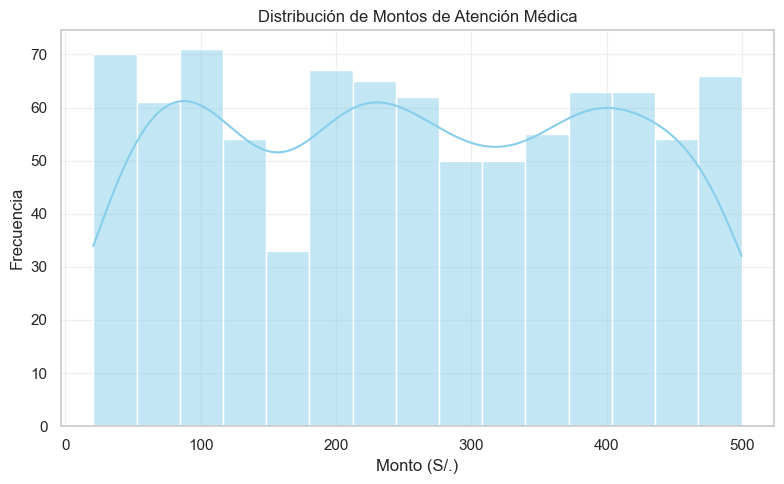

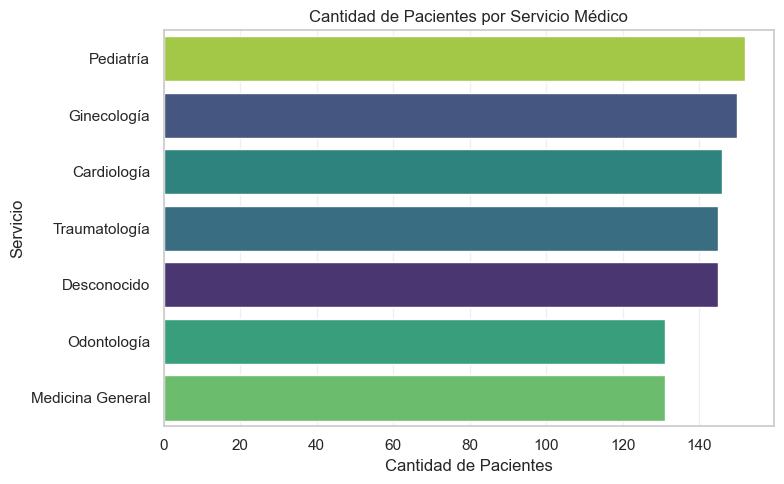

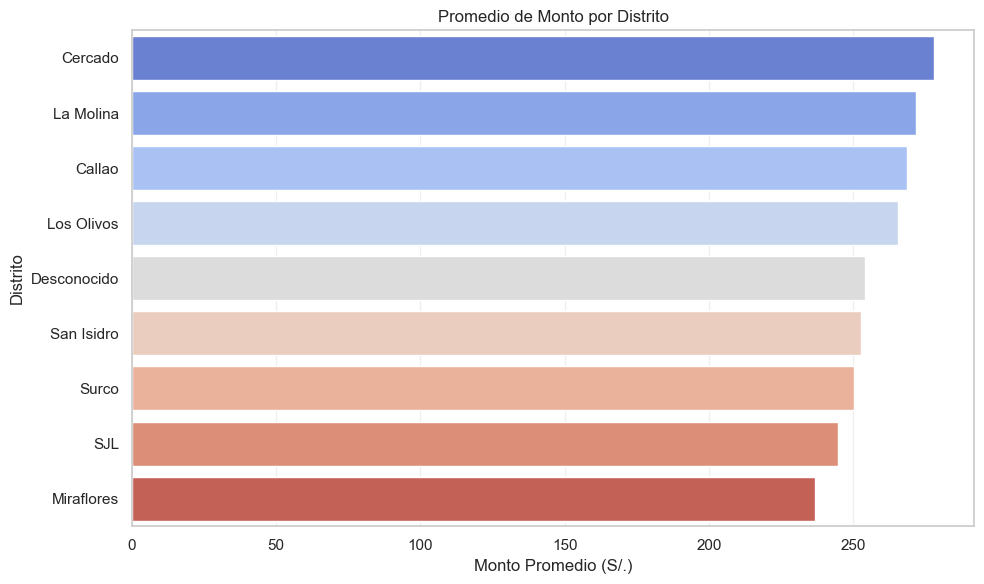

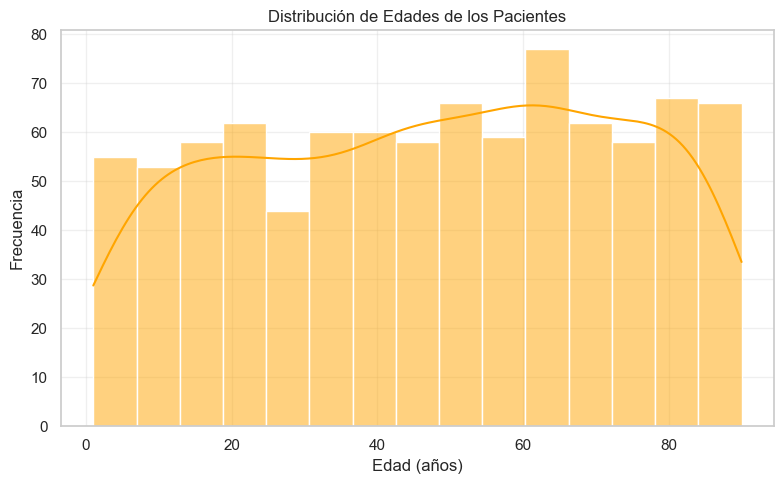


üèÜ Top 5 distritos con mayor monto total de atenci√≥n:
      distrito     monto
0   La Molina  28270.61
1  Los Olivos  27340.86
2     Cercado  27250.51
3       Surco  26042.20
4      Callao  24985.99


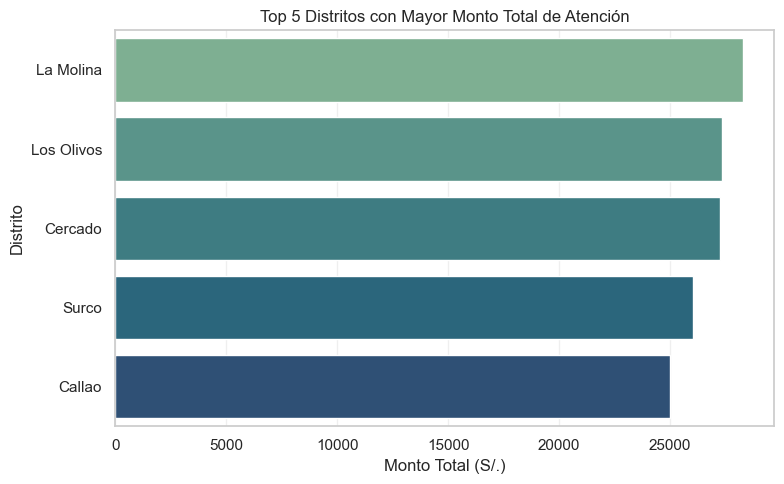


‚úÖ Visualizaciones generadas correctamente en la carpeta:
e:\SaludDigitalBD_E1\reports


In [1]:
# 6_visualizacion_pacientes.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1Ô∏è‚É£ Definir rutas
database_path = Path.cwd().parent / "database"
reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(parents=True, exist_ok=True)

input_file = database_path / "pacientes_clean.csv"

# 2Ô∏è‚É£ Cargar datos
try:
    df = pd.read_csv(input_file)
    print(f"üìñ Datos cargados correctamente: {len(df)} registros.\n")
except FileNotFoundError:
    print("‚ö†Ô∏è No se encontr√≥ el archivo pacientes_clean.csv. Ejecuta primero el ETL (4_proceso_etl.py).")
    exit()

# 3Ô∏è‚É£ Nota para instalaci√≥n de librer√≠as
print("üí° Si hay error al ejecutar, instala las librer√≠as necesarias:\n")
print("pip install matplotlib seaborn pandas pymongo\n")

# üé® Estilo de gr√°ficos
sns.set(style="whitegrid")

# ===============================================================
# üìà 1. Distribuci√≥n de montos por atenci√≥n m√©dica
# ===============================================================
plt.figure(figsize=(8,5))
sns.histplot(df["monto"], bins=15, kde=True, color='skyblue')
plt.title("Distribuci√≥n de Montos de Atenci√≥n M√©dica")
plt.xlabel("Monto (S/.)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_montos.png")
plt.show()

# ===============================================================
# üìä 2. N√∫mero de pacientes por servicio
# ===============================================================
"""
üìù Explicaci√≥n:
- hue="servicio" colorea cada categor√≠a de servicio.
- legend=False oculta la leyenda redundante (ya est√° representada en el eje y).
"""
plt.figure(figsize=(8,5))
sns.countplot(
    y="servicio",
    hue="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Cantidad de Pacientes por Servicio M√©dico")
plt.xlabel("Cantidad de Pacientes")
plt.ylabel("Servicio")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_por_servicio.png")
plt.show()

# ===============================================================
# üß≠ 3. Promedio de monto por distrito
# ===============================================================
"""
Explicaci√≥n:
- Agrupamos los registros por distrito y calculamos el monto promedio.
- Convertimos a DataFrame para usar hue con seaborn >=0.14.
"""
promedio_distrito = df.groupby("distrito")["monto"].mean().sort_values(ascending=False)
df_prom = promedio_distrito.reset_index()
df_prom.columns = ["Distrito", "PromedioMonto"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_prom,
    x="PromedioMonto",
    y="Distrito",
    hue="Distrito",
    palette="coolwarm",
    legend=False
)
plt.title("Promedio de Monto por Distrito")
plt.xlabel("Monto Promedio (S/.)")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_monto_distrito.png")
plt.show()

# ===============================================================
# üßí 4. Distribuci√≥n de edades de los pacientes
# ===============================================================
plt.figure(figsize=(8,5))
sns.histplot(df["edad"], bins=15, kde=True, color='orange')
plt.title("Distribuci√≥n de Edades de los Pacientes")
plt.xlabel("Edad (a√±os)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_edades.png")
plt.show()

# ===============================================================
# üèÜ 5. Distritos con mayor monto total (Top 5)
# ===============================================================
top_distritos = df.groupby("distrito")["monto"].sum().nlargest(5).reset_index()
print("\nüèÜ Top 5 distritos con mayor monto total de atenci√≥n:\n", top_distritos)

plt.figure(figsize=(8,5))
sns.barplot(
    data=top_distritos,
    x="monto",
    y="distrito",
    hue="distrito",
    palette="crest",
    legend=False
)
plt.title("Top 5 Distritos con Mayor Monto Total de Atenci√≥n")
plt.xlabel("Monto Total (S/.)")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "top5_distritos_monto.png")
plt.show()

# ===============================================================
# üìÅ Confirmaci√≥n final
# ===============================================================
print("\n‚úÖ Visualizaciones generadas correctamente en la carpeta:")
print(reports_path)
